<a href="https://colab.research.google.com/github/kavyakalivarapu-lab/ML-project/blob/main/SocialMediaSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the Train and Test dataset**

In [50]:
from google.colab import drive
drive.mount('/content/drive')
path1='/content/drive/MyDrive/ML/sem_project/Train.csv'
path2='/content/drive/MyDrive/ML/sem_project/Test.csv'
train=pd.read_csv(path1)
test=pd.read_csv(path2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exploratory Data Analysis(EDA)**

In [51]:
print("Training dataset:")
print(train.head())
print("Testing dataset:")
print(test.head())


Training dataset:
   Id                                               Body Sentiment Type
0   1  rule 2 no metes about polarizing political top...        neutral
1   2                                                NaN        neutral
2   3  no politics danger now i can make a propaganda...       negative
3   4                       i am the senate gets stabbed        neutral
4   5                                  is this a suicide        neutral
Testing dataset:
   Id                                               Body
0   1  rule 2 no metes about polarizing political top...
1   2                                                NaN
2   3  no politics danger now i can make a propaganda...
3   4                       i am the senate gets stabbed
4   5                                  is this a suicide


In [52]:
train.shape

(2000, 3)

In [53]:
test.shape

(2000, 2)

In [54]:
print(train.isnull().sum())
print("\n\n",test.isnull().sum())

Id                  0
Body              228
Sentiment Type      0
dtype: int64


 Id        0
Body    228
dtype: int64


In [55]:
train.dropna(inplace=True)

In [56]:
train.isnull().sum()

,0
Id,0
Body,0
Sentiment Type,0


In [57]:
train.shape

(1772, 3)

In [58]:
test.dropna(inplace=True)

In [59]:
test.isnull().sum()

,0
Id,0
Body,0


In [60]:
test.shape

(1772, 2)

In [61]:
train.drop(columns=['Id'],inplace=True)
test.drop(columns=['Id'],inplace=True)


In [27]:
print(train.head(),test.head())

                                                Body Sentiment Type
0  rule 2 no metes about polarizing political top...        neutral
1                                                NaN        neutral
2  no politics danger now i can make a propaganda...       negative
3                       i am the senate gets stabbed        neutral
4                                  is this a suicide        neutral                                                 Body
0  rule 2 no metes about polarizing political top...
1                                                NaN
2  no politics danger now i can make a propaganda...
3                       i am the senate gets stabbed
4                                  is this a suicide


In [62]:
train.rename(columns={'Body':'Tweet','Sentiment Type':'Target'},inplace=True)
test.rename(columns={'Body':'Tweet'},inplace=True)
print(train.head())
print("\n\n",test.head())

                                               Tweet    Target
0  rule 2 no metes about polarizing political top...   neutral
2  no politics danger now i can make a propaganda...  negative
3                       i am the senate gets stabbed   neutral
4                                  is this a suicide   neutral
5                                            removed   neutral


                                                Tweet
0  rule 2 no metes about polarizing political top...
2  no politics danger now i can make a propaganda...
3                       i am the senate gets stabbed
4                                  is this a suicide
5                                            removed


In [13]:
train['Sentiment Type'].value_counts()

,count
Sentiment Type,
neutral,1010
positive,632
negative,358


**Text Normalization**

In [64]:
import re
import nltk
!pip install emoji
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
from bs4 import BeautifulSoup


#downloading NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [65]:
lemmatizer=WordNetLemmatizer
stop_words=set(stopwords.words('english'))


In [ ]:
def preprocess(text):
  if isinstance(text,str):
    text=str(text).lower().strip()
    text=text.replace('%' ,'percent')
    text=text.replace('$','dollar')

    text=emoji.replace_emoji(text,replace='')

    text=text.replace(',000,000,000' ,'b')
    text=text.replace(',000,000','m')
    text=text.replace(',000','k')
    text=re.sub(r'([0-9]+)000000000',r'\1b',text)
    text=re.sub(r'([0-9]+)000000',r'\1m',text)
    text=re.sub(r'([0-9]+)000',r'\1k',text)
    text=re.sub(r'[^a-zA-Z\s]','',text)
    text=re.sub(r'<[^>!?#@]*>', '',text)

    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "im": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
      }
    text_decontracted=[]
    for word in text.split():
      if word in contractions:
        word=contractions.get(word,word)
        text_decontracted.append(word)
    text=' '.join(text_decontracted)
    text=text.replace('')



<ipython-input-21-8af7221e1d13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train,x='Sentiment Type',palette='pastel')


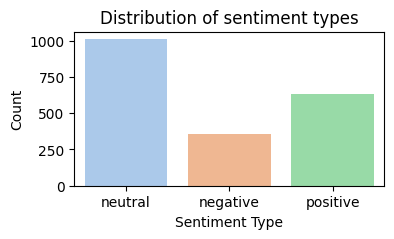

In [21]:
plt.figure(figsize=(4,2))
sns.countplot(data=train,x='Sentiment Type',palette='pastel')
plt.title('Distribution of sentiment types')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()